In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns  # visualization tool

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

Iris.csv
database.sqlite



In [2]:
data = pd.read_csv('../input/Iris.csv')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [3]:
data.corr()
# it seems that there is a correlation between SepalLength and PetalLength

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


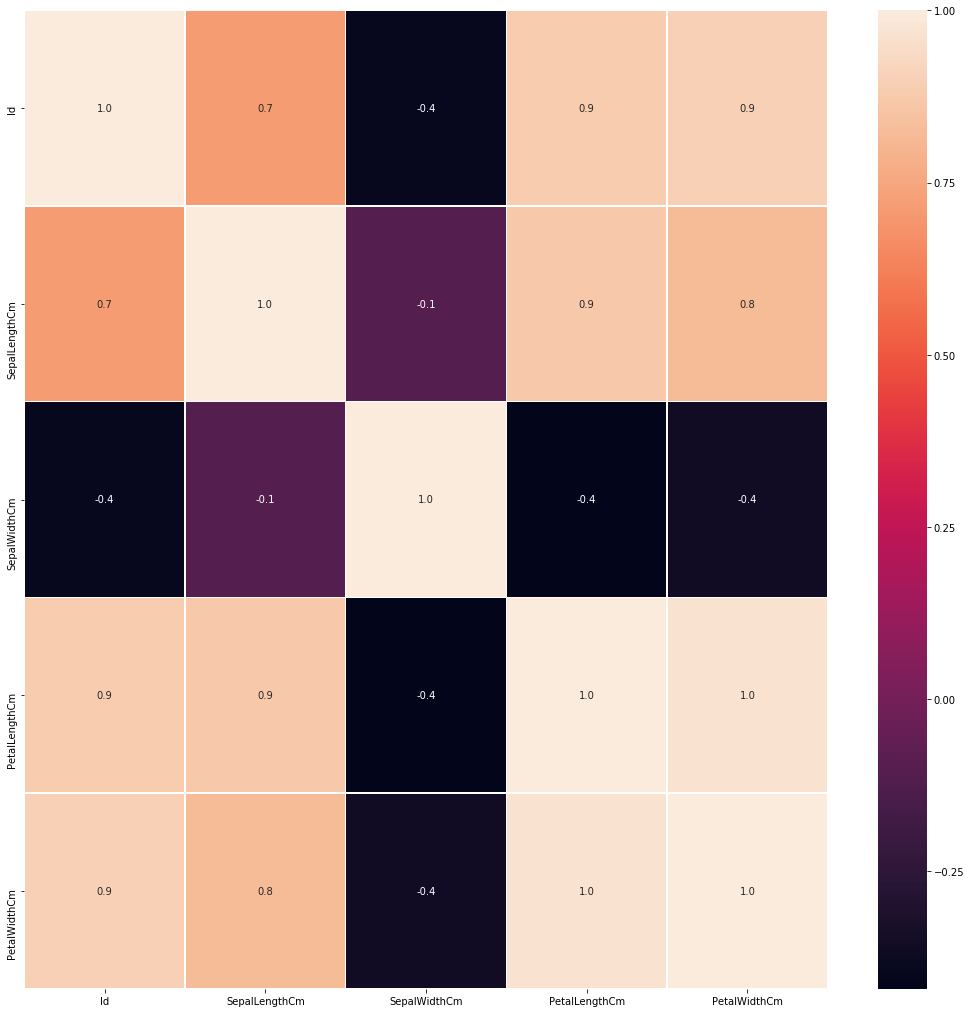

In [4]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

In [5]:
data.head(10)


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [6]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

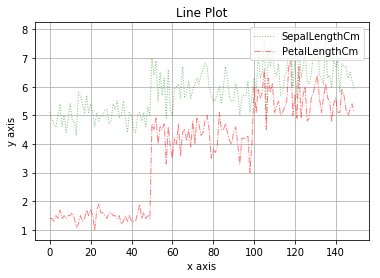

In [7]:
# Ploting Features

# Line Plot
# color = color, label = label, linewidth = width of line, alpha = opacity, grid = grid, linestyle = sytle of line
data.SepalLengthCm.plot(kind = 'line', color = 'g',label = 'SepalLengthCm',linewidth=1,alpha = 0.5,grid = True,linestyle = ':')
data.PetalLengthCm.plot(color = 'r',label = 'PetalLengthCm',linewidth=1, alpha = 0.5,grid = True,linestyle = '-.')
plt.legend(loc='upper right')     # legend = puts label into plot
plt.xlabel('x axis')              # label = name of label
plt.ylabel('y axis')
plt.title('Line Plot')            # title = title of plot
plt.show()

Text(0.5,1,'SepalLengthCm - PetalLengthCm Scatter Plot')

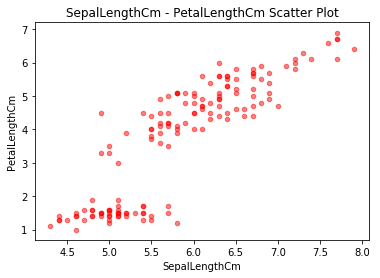

In [8]:
# Scatter Plot 
# x = attack, y = defense
data.plot(kind='scatter', x='SepalLengthCm', y='PetalLengthCm',alpha = 0.5,color = 'red')
plt.xlabel('SepalLengthCm')              # label = name of label
plt.ylabel('PetalLengthCm')
plt.title('SepalLengthCm - PetalLengthCm Scatter Plot')            # title = title of plot

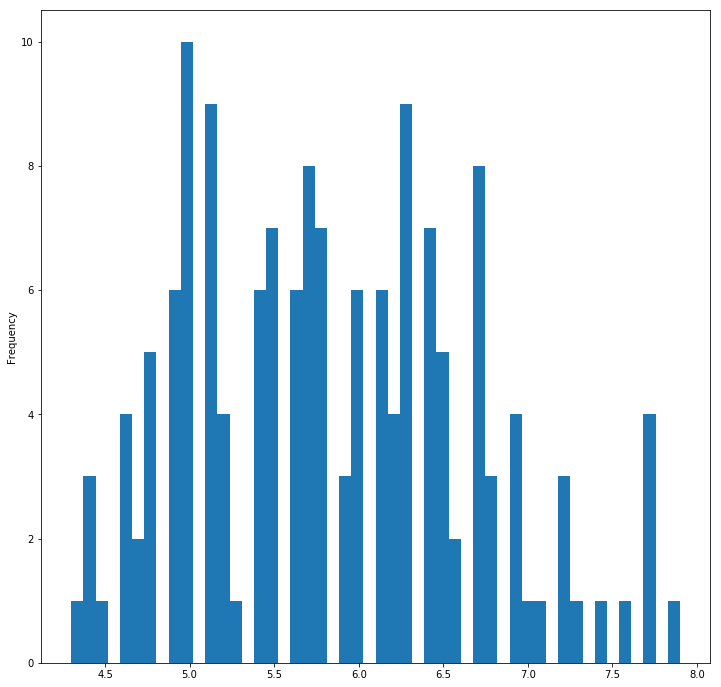

In [9]:
# Histogram
# bins = number of bar in figure
data.SepalLengthCm.plot(kind = 'hist',bins = 50,figsize = (12,12))
plt.show()

In [10]:
# Pandas Lib. Studies

series = data["SepalLengthCm"]
print(type(series))
data_frame = data[["SepalLengthCm"]]
print(type(data_frame))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


In [11]:
# Filtering the data
x = data["SepalLengthCm"] > 7
data[x]
# there are 12 instances that has more than 7 cm sepal length



,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
102,103,7.1,3.0,5.9,2.1,Iris-virginica
105,106,7.6,3.0,6.6,2.1,Iris-virginica
107,108,7.3,2.9,6.3,1.8,Iris-virginica
109,110,7.2,3.6,6.1,2.5,Iris-virginica
117,118,7.7,3.8,6.7,2.2,Iris-virginica
118,119,7.7,2.6,6.9,2.3,Iris-virginica
122,123,7.7,2.8,6.7,2.0,Iris-virginica
125,126,7.2,3.2,6.0,1.8,Iris-virginica
129,130,7.2,3.0,5.8,1.6,Iris-virginica
130,131,7.4,2.8,6.1,1.9,Iris-virginica


In [12]:
# Filtering pandas with logical and&

data[(data["PetalLengthCm"]>6) & (data["SepalLengthCm"] > 6)]

#there are 9 subjects that satisfy the condition




,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
105,106,7.6,3.0,6.6,2.1,Iris-virginica
107,108,7.3,2.9,6.3,1.8,Iris-virginica
109,110,7.2,3.6,6.1,2.5,Iris-virginica
117,118,7.7,3.8,6.7,2.2,Iris-virginica
118,119,7.7,2.6,6.9,2.3,Iris-virginica
122,123,7.7,2.8,6.7,2.0,Iris-virginica
130,131,7.4,2.8,6.1,1.9,Iris-virginica
131,132,7.9,3.8,6.4,2.0,Iris-virginica
135,136,7.7,3.0,6.1,2.3,Iris-virginica


In [13]:
threshold = sum(data.SepalLengthCm)/len(data.SepalLengthCm)
data["sepal_level"] = ["high" if i > threshold else "low" for i in data.SepalLengthCm]
data.loc[:50,["sepal_level","SepalLengthCm"]]  
# In first 50 samples there is only one subject that is above our theshold

,sepal_level,SepalLengthCm
0,low,5.1
1,low,4.9
2,low,4.7
3,low,4.6
4,low,5.0
5,low,5.4
6,low,4.6
7,low,5.0
8,low,4.4
9,low,4.9


In [14]:
data.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,sepal_level
0,1,5.1,3.5,1.4,0.2,Iris-setosa,low
1,2,4.9,3.0,1.4,0.2,Iris-setosa,low
2,3,4.7,3.2,1.3,0.2,Iris-setosa,low
3,4,4.6,3.1,1.5,0.2,Iris-setosa,low
4,5,5.0,3.6,1.4,0.2,Iris-setosa,low


In [15]:
data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,sepal_level
145,146,6.7,3.0,5.2,2.3,Iris-virginica,high
146,147,6.3,2.5,5.0,1.9,Iris-virginica,high
147,148,6.5,3.0,5.2,2.0,Iris-virginica,high
148,149,6.2,3.4,5.4,2.3,Iris-virginica,high
149,150,5.9,3.0,5.1,1.8,Iris-virginica,high


In [16]:
# exploratory data analysis

print(data['Species'].value_counts(dropna =False)) 
# with value_counts method we can obtain frequency or amount of subjects. 


Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64


In [17]:
data.describe() #ignore null entries

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


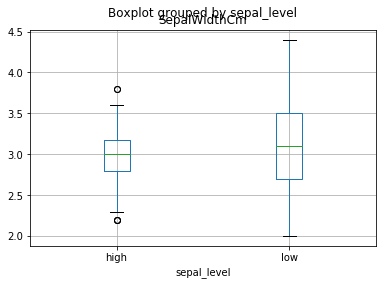

In [18]:
#VISUAL EXPLORATORY DATA ANALYSIS
#Box plots: visualize basic statistics like outliers, min/max or quantiles

# For example: compare attack of pokemons that are legendary  or not
# Black line at top is max
# Blue line at top is 75%
# Red line is median (50%)
# Blue line at bottom is 25%
# Black line at bottom is min
# There are no outliers
data.boxplot(column='SepalWidthCm',by = 'sepal_level')

In [19]:
# Tidy Data

data_new = data.tail()
data_new

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,sepal_level
145,146,6.7,3.0,5.2,2.3,Iris-virginica,high
146,147,6.3,2.5,5.0,1.9,Iris-virginica,high
147,148,6.5,3.0,5.2,2.0,Iris-virginica,high
148,149,6.2,3.4,5.4,2.3,Iris-virginica,high
149,150,5.9,3.0,5.1,1.8,Iris-virginica,high


In [20]:
# melting
# id_vars = what we do not wish to melt
# value_vars = what we want to melt
melted = pd.melt(frame=data_new,id_vars = 'Species', value_vars= ['PetalLengthCm','PetalWidthCm'])
melted

,Species,variable,value
0,Iris-virginica,PetalLengthCm,5.2
1,Iris-virginica,PetalLengthCm,5.0
2,Iris-virginica,PetalLengthCm,5.2
3,Iris-virginica,PetalLengthCm,5.4
4,Iris-virginica,PetalLengthCm,5.1
5,Iris-virginica,PetalWidthCm,2.3
6,Iris-virginica,PetalWidthCm,1.9
7,Iris-virginica,PetalWidthCm,2.0
8,Iris-virginica,PetalWidthCm,2.3
9,Iris-virginica,PetalWidthCm,1.8


In [21]:
#PIVOTING DATA
#Reverse of melting.

#melted.pivot(index = 'Species', columns = 'variable',values='value')

In [22]:
# CONCATENATING DATA
#We can concatenate two dataframe

# Firstly lets create 2 data frame
data1 = data.head()
data2= data.tail()
conc_data_row = pd.concat([data1,data2],axis =0,ignore_index =True) # axis = 0 : adds dataframes in row
conc_data_row

#vertical data conc.

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,sepal_level
0,1,5.1,3.5,1.4,0.2,Iris-setosa,low
1,2,4.9,3.0,1.4,0.2,Iris-setosa,low
2,3,4.7,3.2,1.3,0.2,Iris-setosa,low
3,4,4.6,3.1,1.5,0.2,Iris-setosa,low
4,5,5.0,3.6,1.4,0.2,Iris-setosa,low
5,146,6.7,3.0,5.2,2.3,Iris-virginica,high
6,147,6.3,2.5,5.0,1.9,Iris-virginica,high
7,148,6.5,3.0,5.2,2.0,Iris-virginica,high
8,149,6.2,3.4,5.4,2.3,Iris-virginica,high
9,150,5.9,3.0,5.1,1.8,Iris-virginica,high


In [23]:
data1 = data['SepalWidthCm'].head()
data2= data['SepalLengthCm'].head()
conc_data_col = pd.concat([data1,data2],axis =1) # axis = 0 : adds dataframes in row
conc_data_col

#horizontal data conc.

,SepalWidthCm,SepalLengthCm
0,3.5,5.1
1,3.0,4.9
2,3.2,4.7
3,3.1,4.6
4,3.6,5.0


DATA TYPES
There are 5 basic data types: object(string),booleab, integer, float and categorical. 
We can make conversion data types like from str to categorical or from int to float 
Why is category important:

make dataframe smaller in memory
can be utilized for anlaysis especially for sklear

In [24]:
data.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
sepal_level       object
dtype: object

In [25]:
# lets convert object(str) to categorical and int to float.
data['Species'] = data['Species'].astype('category')
data['Id'] = data['Id'].astype('float')

In [26]:
# As you can see Species is converted from object to categorical
# And Id converted from int to float
data.dtypes

Id                float64
SepalLengthCm     float64
SepalWidthCm      float64
PetalLengthCm     float64
PetalWidthCm      float64
Species          category
sepal_level        object
dtype: object

In [27]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
Id               150 non-null float64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null category
sepal_level      150 non-null object
dtypes: category(1), float64(5), object(1)
memory usage: 7.4+ KB


In [28]:
data1=pd.read_csv('../input/Iris.csv')
data1["Species"].value_counts(dropna =False)
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


BUILDING DATA FRAMES FROM SCRATCH
We can build data frames from csv as we did earlier.
Also we can build dataframe from dictionaries
zip() method: This function returns a list of tuples, where the i-th tuple contains the i-th element from each of the argument sequences or iterables.
Adding new column
Broadcasting: Create new column and assign a value to entire column

In [29]:
# data frames from dictionary
country = ["Iceland","Sweden"]
population = ["11","12"]
list_label = ["country","population"]
list_col = [country,population]
list_col
zipped = list(zip(list_label,list_col))
data_dict = dict(zipped)
df = pd.DataFrame(data_dict)
df

,country,population
0,Iceland,11
1,Sweden,12


In [30]:
# Add new columns
df["capital"] = ["Reykjavik","Stockholm"]
df

,country,population,capital
0,Iceland,11,Reykjavik
1,Sweden,12,Stockholm


In [31]:
# Broadcasting
df["income"] = 0 #Broadcasting entire column
df

,country,population,capital,income
0,Iceland,11,Reykjavik,0
1,Sweden,12,Stockholm,0


VISUAL EXPLORATORY DATA ANALYSIS



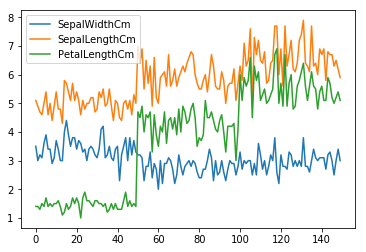

In [32]:
data1 = data.loc[:,["SepalWidthCm","SepalLengthCm","PetalLengthCm"]]
data1.plot()

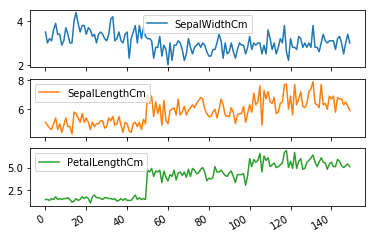

In [33]:
# subplots
data1.plot(subplots = True)
plt.show()

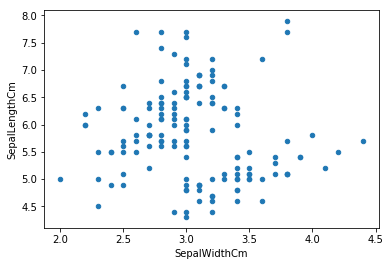

In [34]:
# scatter plot  
data1.plot(kind = "scatter",x="SepalWidthCm",y = "SepalLengthCm")
plt.show()

/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


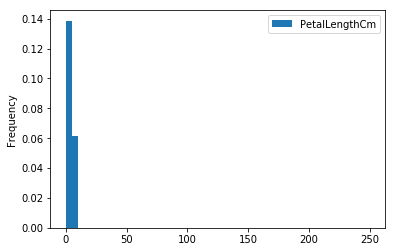

In [35]:
# hist plot  
data1.plot(kind = "hist",y = "PetalLengthCm",bins = 50,range= (0,250),normed = True)

/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.6/site-packages/matplotlib/pyplot.py'>

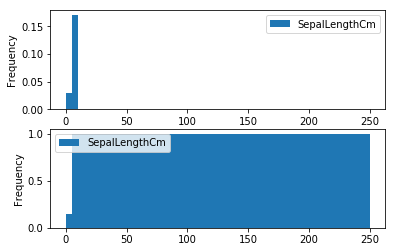

In [36]:
# histogram subplot with non cumulative and cumulative
fig, axes = plt.subplots(nrows=2,ncols=1)
data1.plot(kind = "hist",y = "SepalLengthCm",bins = 50,range= (0,250),normed = True,ax = axes[0])
data1.plot(kind = "hist",y = "SepalLengthCm",bins = 50,range= (0,250),normed = True,ax = axes[1],cumulative = True)
plt.savefig('graph.png')
plt


STATISTICAL EXPLORATORY DATA ANALYSIS


count: number of entries
mean: average of entries
std: standart deviation
min: minimum entry
25%: first quantile
50%: median or second quantile
75%: third quantile
max: maximum entry

In [37]:
data.describe()
#describe method to see statistical exploratory data analysis

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000



INDEXING PANDAS TIME SERIES
datetime = object
parse_dates(boolean): Transform date to ISO 8601 (yyyy-mm-dd hh:mm:ss ) format

In [38]:
time_list = ["1992-03-08","1992-04-12"]
print(type(time_list[1])) # As you can see date is string
# however we want it to be datetime object
datetime_object = pd.to_datetime(time_list)
print(type(datetime_object))

<class 'str'>
<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [39]:
# close warning
import warnings
warnings.filterwarnings("ignore")
# In order to practice lets take head of pokemon data and add it a time list
data2 = data.head()
date_list = ["1992-01-10","1992-02-10","1992-03-10","1993-03-15","1993-03-16"]
datetime_object = pd.to_datetime(date_list)
data2["date"] = datetime_object
# lets make date as index
data2= data2.set_index("date")
data2 

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,sepal_level
date,,,,,,,
1992-01-10,1.0,5.1,3.5,1.4,0.2,Iris-setosa,low
1992-02-10,2.0,4.9,3.0,1.4,0.2,Iris-setosa,low
1992-03-10,3.0,4.7,3.2,1.3,0.2,Iris-setosa,low
1993-03-15,4.0,4.6,3.1,1.5,0.2,Iris-setosa,low
1993-03-16,5.0,5.0,3.6,1.4,0.2,Iris-setosa,low


In [40]:
# Now we can select according to our date index
print(data2.loc["1993-03-16"])
print(data2.loc["1992-03-10":"1993-03-16"])

Id                         5
SepalLengthCm              5
SepalWidthCm             3.6
PetalLengthCm            1.4
PetalWidthCm             0.2
Species          Iris-setosa
sepal_level              low
Name: 1993-03-16 00:00:00, dtype: object
             Id  SepalLengthCm     ...           Species  sepal_level
date                               ...                               
1992-03-10  3.0            4.7     ...       Iris-setosa          low
1993-03-15  4.0            4.6     ...       Iris-setosa          low
1993-03-16  5.0            5.0     ...       Iris-setosa          low

[3 rows x 7 columns]


In [41]:

#RESAMPLING PANDAS TIME SERIES
# We will use data2 that we create at previous part
data2.resample("A").mean()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
date,,,,,
1992-12-31,2.0,4.9,3.233333,1.366667,0.2
1993-12-31,4.5,4.8,3.350000,1.450000,0.2


In [42]:
# Lets resample with month
data2.resample("M").mean()
# As you can see there are a lot of nan because data2 does not include all months

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
date,,,,,
1992-01-31,1.0,5.1,3.50,1.40,0.2
1992-02-29,2.0,4.9,3.00,1.40,0.2
1992-03-31,3.0,4.7,3.20,1.30,0.2
1992-04-30,NaN,NaN,NaN,NaN,NaN
1992-05-31,NaN,NaN,NaN,NaN,NaN
1992-06-30,NaN,NaN,NaN,NaN,NaN
1992-07-31,NaN,NaN,NaN,NaN,NaN
1992-08-31,NaN,NaN,NaN,NaN,NaN
1992-09-30,NaN,NaN,NaN,NaN,NaN


In [43]:
# In real life (data is real. Not created from us like data2) we can solve this problem with interpolate
# We can interpolete from first value
data2.resample("M").first().interpolate("linear")

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,sepal_level
date,,,,,,,
1992-01-31,1.000000,5.100000,3.500000,1.400000,0.2,Iris-setosa,low
1992-02-29,2.000000,4.900000,3.000000,1.400000,0.2,Iris-setosa,low
1992-03-31,3.000000,4.700000,3.200000,1.300000,0.2,Iris-setosa,low
1992-04-30,3.083333,4.691667,3.191667,1.316667,0.2,NaN,NaN
1992-05-31,3.166667,4.683333,3.183333,1.333333,0.2,NaN,NaN
1992-06-30,3.250000,4.675000,3.175000,1.350000,0.2,NaN,NaN
1992-07-31,3.333333,4.666667,3.166667,1.366667,0.2,NaN,NaN
1992-08-31,3.416667,4.658333,3.158333,1.383333,0.2,NaN,NaN
1992-09-30,3.500000,4.650000,3.150000,1.400000,0.2,NaN,NaN


In [44]:
# Or we can interpolate with mean()
data2.resample("M").mean().interpolate("linear")

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
date,,,,,
1992-01-31,1.000,5.100000,3.5000,1.4000,0.2
1992-02-29,2.000,4.900000,3.0000,1.4000,0.2
1992-03-31,3.000,4.700000,3.2000,1.3000,0.2
1992-04-30,3.125,4.708333,3.2125,1.3125,0.2
1992-05-31,3.250,4.716667,3.2250,1.3250,0.2
1992-06-30,3.375,4.725000,3.2375,1.3375,0.2
1992-07-31,3.500,4.733333,3.2500,1.3500,0.2
1992-08-31,3.625,4.741667,3.2625,1.3625,0.2
1992-09-30,3.750,4.750000,3.2750,1.3750,0.2



INDEXING DATA FRAMES
Indexing using square brackets
Using column attribute and row label
Using loc accessor
Selecting only some columns

In [45]:
# read data
data = pd.read_csv('../input/Iris.csv')
data= data.set_index("#")
data.head()

KeyError: '#'

In [46]:
# indexing using square brackets
data["PetalWidthCm"][1]

0.2

In [47]:
# using column attribute and row label
data.PetalWidthCm[1]

0.2

In [48]:
# using loc accessor
data.loc[1,["PetalWidthCm"]]

PetalWidthCm    0.2
Name: 1, dtype: object

In [49]:
# Selecting only some columns
data[["PetalLengthCm","PetalWidthCm"]]

,PetalLengthCm,PetalWidthCm
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
5,1.7,0.4
6,1.4,0.3
7,1.5,0.2
8,1.4,0.2
9,1.5,0.1


In [50]:
# Difference between selecting columns: series and dataframes
print(type(data["PetalLengthCm"]))     # series
print(type(data[["PetalLengthCm"]]))   # data frames



<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


In [51]:
# Slicing and indexing series
data.loc[1:10,"SepalLengthCm":"PetalLengthCm"]   # 10 and "PetalLengthCm" are inclusive

,SepalLengthCm,SepalWidthCm,PetalLengthCm
1,4.9,3.0,1.4
2,4.7,3.2,1.3
3,4.6,3.1,1.5
4,5.0,3.6,1.4
5,5.4,3.9,1.7
6,4.6,3.4,1.4
7,5.0,3.4,1.5
8,4.4,2.9,1.4
9,4.9,3.1,1.5
10,5.4,3.7,1.5


In [52]:
# Reverse slicing 
data.loc[10:1:-1,"SepalLengthCm":"PetalLengthCm"] 

,SepalLengthCm,SepalWidthCm,PetalLengthCm
10,5.4,3.7,1.5
9,4.9,3.1,1.5
8,4.4,2.9,1.4
7,5.0,3.4,1.5
6,4.6,3.4,1.4
5,5.4,3.9,1.7
4,5.0,3.6,1.4
3,4.6,3.1,1.5
2,4.7,3.2,1.3
1,4.9,3.0,1.4


In [53]:
# From something to end
data.loc[1:10,"SepalLengthCm":] 

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa
10,5.4,3.7,1.5,0.2,Iris-setosa


In [54]:
#FILTERING DATA FRAMES

#Creating boolean series Combining filters Filtering column based others

# Creating boolean series
boolean = data.SepalLengthCm > 7
data[boolean]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
102,103,7.1,3.0,5.9,2.1,Iris-virginica
105,106,7.6,3.0,6.6,2.1,Iris-virginica
107,108,7.3,2.9,6.3,1.8,Iris-virginica
109,110,7.2,3.6,6.1,2.5,Iris-virginica
117,118,7.7,3.8,6.7,2.2,Iris-virginica
118,119,7.7,2.6,6.9,2.3,Iris-virginica
122,123,7.7,2.8,6.7,2.0,Iris-virginica
125,126,7.2,3.2,6.0,1.8,Iris-virginica
129,130,7.2,3.0,5.8,1.6,Iris-virginica
130,131,7.4,2.8,6.1,1.9,Iris-virginica


In [55]:
# Combining filters
first_filter = data.SepalLengthCm > 7
second_filter = data.SepalWidthCm > 3.2
data[first_filter & second_filter]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
109,110,7.2,3.6,6.1,2.5,Iris-virginica
117,118,7.7,3.8,6.7,2.2,Iris-virginica
131,132,7.9,3.8,6.4,2.0,Iris-virginica


In [56]:
#TRANSFORMING DATA

# Plain python functions
def div(n):
    return n/2
data.SepalWidthCm.apply(div)

0      1.75
1      1.50
2      1.60
3      1.55
4      1.80
5      1.95
6      1.70
7      1.70
8      1.45
9      1.55
10     1.85
11     1.70
12     1.50
13     1.50
14     2.00
15     2.20
16     1.95
17     1.75
18     1.90
19     1.90
20     1.70
21     1.85
22     1.80
23     1.65
24     1.70
25     1.50
26     1.70
27     1.75
28     1.70
29     1.60
       ... 
120    1.60
121    1.40
122    1.40
123    1.35
124    1.65
125    1.60
126    1.40
127    1.50
128    1.40
129    1.50
130    1.40
131    1.90
132    1.40
133    1.40
134    1.30
135    1.50
136    1.70
137    1.55
138    1.50
139    1.55
140    1.55
141    1.55
142    1.35
143    1.60
144    1.65
145    1.50
146    1.25
147    1.50
148    1.70
149    1.50
Name: SepalWidthCm, Length: 150, dtype: float64

In [57]:
# Or we can use lambda function
data.SepalWidthCm.apply(lambda n : n/2)

0      1.75
1      1.50
2      1.60
3      1.55
4      1.80
5      1.95
6      1.70
7      1.70
8      1.45
9      1.55
10     1.85
11     1.70
12     1.50
13     1.50
14     2.00
15     2.20
16     1.95
17     1.75
18     1.90
19     1.90
20     1.70
21     1.85
22     1.80
23     1.65
24     1.70
25     1.50
26     1.70
27     1.75
28     1.70
29     1.60
       ... 
120    1.60
121    1.40
122    1.40
123    1.35
124    1.65
125    1.60
126    1.40
127    1.50
128    1.40
129    1.50
130    1.40
131    1.90
132    1.40
133    1.40
134    1.30
135    1.50
136    1.70
137    1.55
138    1.50
139    1.55
140    1.55
141    1.55
142    1.35
143    1.60
144    1.65
145    1.50
146    1.25
147    1.50
148    1.70
149    1.50
Name: SepalWidthCm, Length: 150, dtype: float64

In [58]:
# Defining column using other columns
data["total_width"] = data.SepalWidthCm + data.PetalWidthCm
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,total_width
0,1,5.1,3.5,1.4,0.2,Iris-setosa,3.7
1,2,4.9,3.0,1.4,0.2,Iris-setosa,3.2
2,3,4.7,3.2,1.3,0.2,Iris-setosa,3.4
3,4,4.6,3.1,1.5,0.2,Iris-setosa,3.3
4,5,5.0,3.6,1.4,0.2,Iris-setosa,3.8


In [59]:
#HIERARCHICAL INDEXING

# lets read data frame one more time to start from beginning
data = pd.read_csv('../input/Iris.csv')
data.head()
# As you can see there is index. However we want to set one or more column to be index

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [60]:
# Setting index : type 1 is outer type 2 is inner index
data1 = data.set_index(["Id","Species"]) 
data1.head(25)


,,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,Species,,,,
1,Iris-setosa,5.1,3.5,1.4,0.2
2,Iris-setosa,4.9,3.0,1.4,0.2
3,Iris-setosa,4.7,3.2,1.3,0.2
4,Iris-setosa,4.6,3.1,1.5,0.2
5,Iris-setosa,5.0,3.6,1.4,0.2
6,Iris-setosa,5.4,3.9,1.7,0.4
7,Iris-setosa,4.6,3.4,1.4,0.3
8,Iris-setosa,5.0,3.4,1.5,0.2
9,Iris-setosa,4.4,2.9,1.4,0.2
